# Heart Stroke Data Analysis Exercise
I'm using the heart stroke data available on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) and using it for a data analysis excercise.

Tools used in the exercise:
* Pandas for analysing data using DataFrames 
* Matplotlib and Seaborn for data visualisation

I'll be answering these questions using the data:
1. Which of the given factors contribute towards causing a heart stroke?
2. What can be said about the other factors observed from the data?
3. What common trends can be identified between the patients who suffered a stroke?

## Setting up the environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

## Loading the data into a Pandas DataFrame

In [3]:
file_path = "healthcare-dataset-stroke-data.csv"
stroke_data = pd.read_csv(file_path)
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


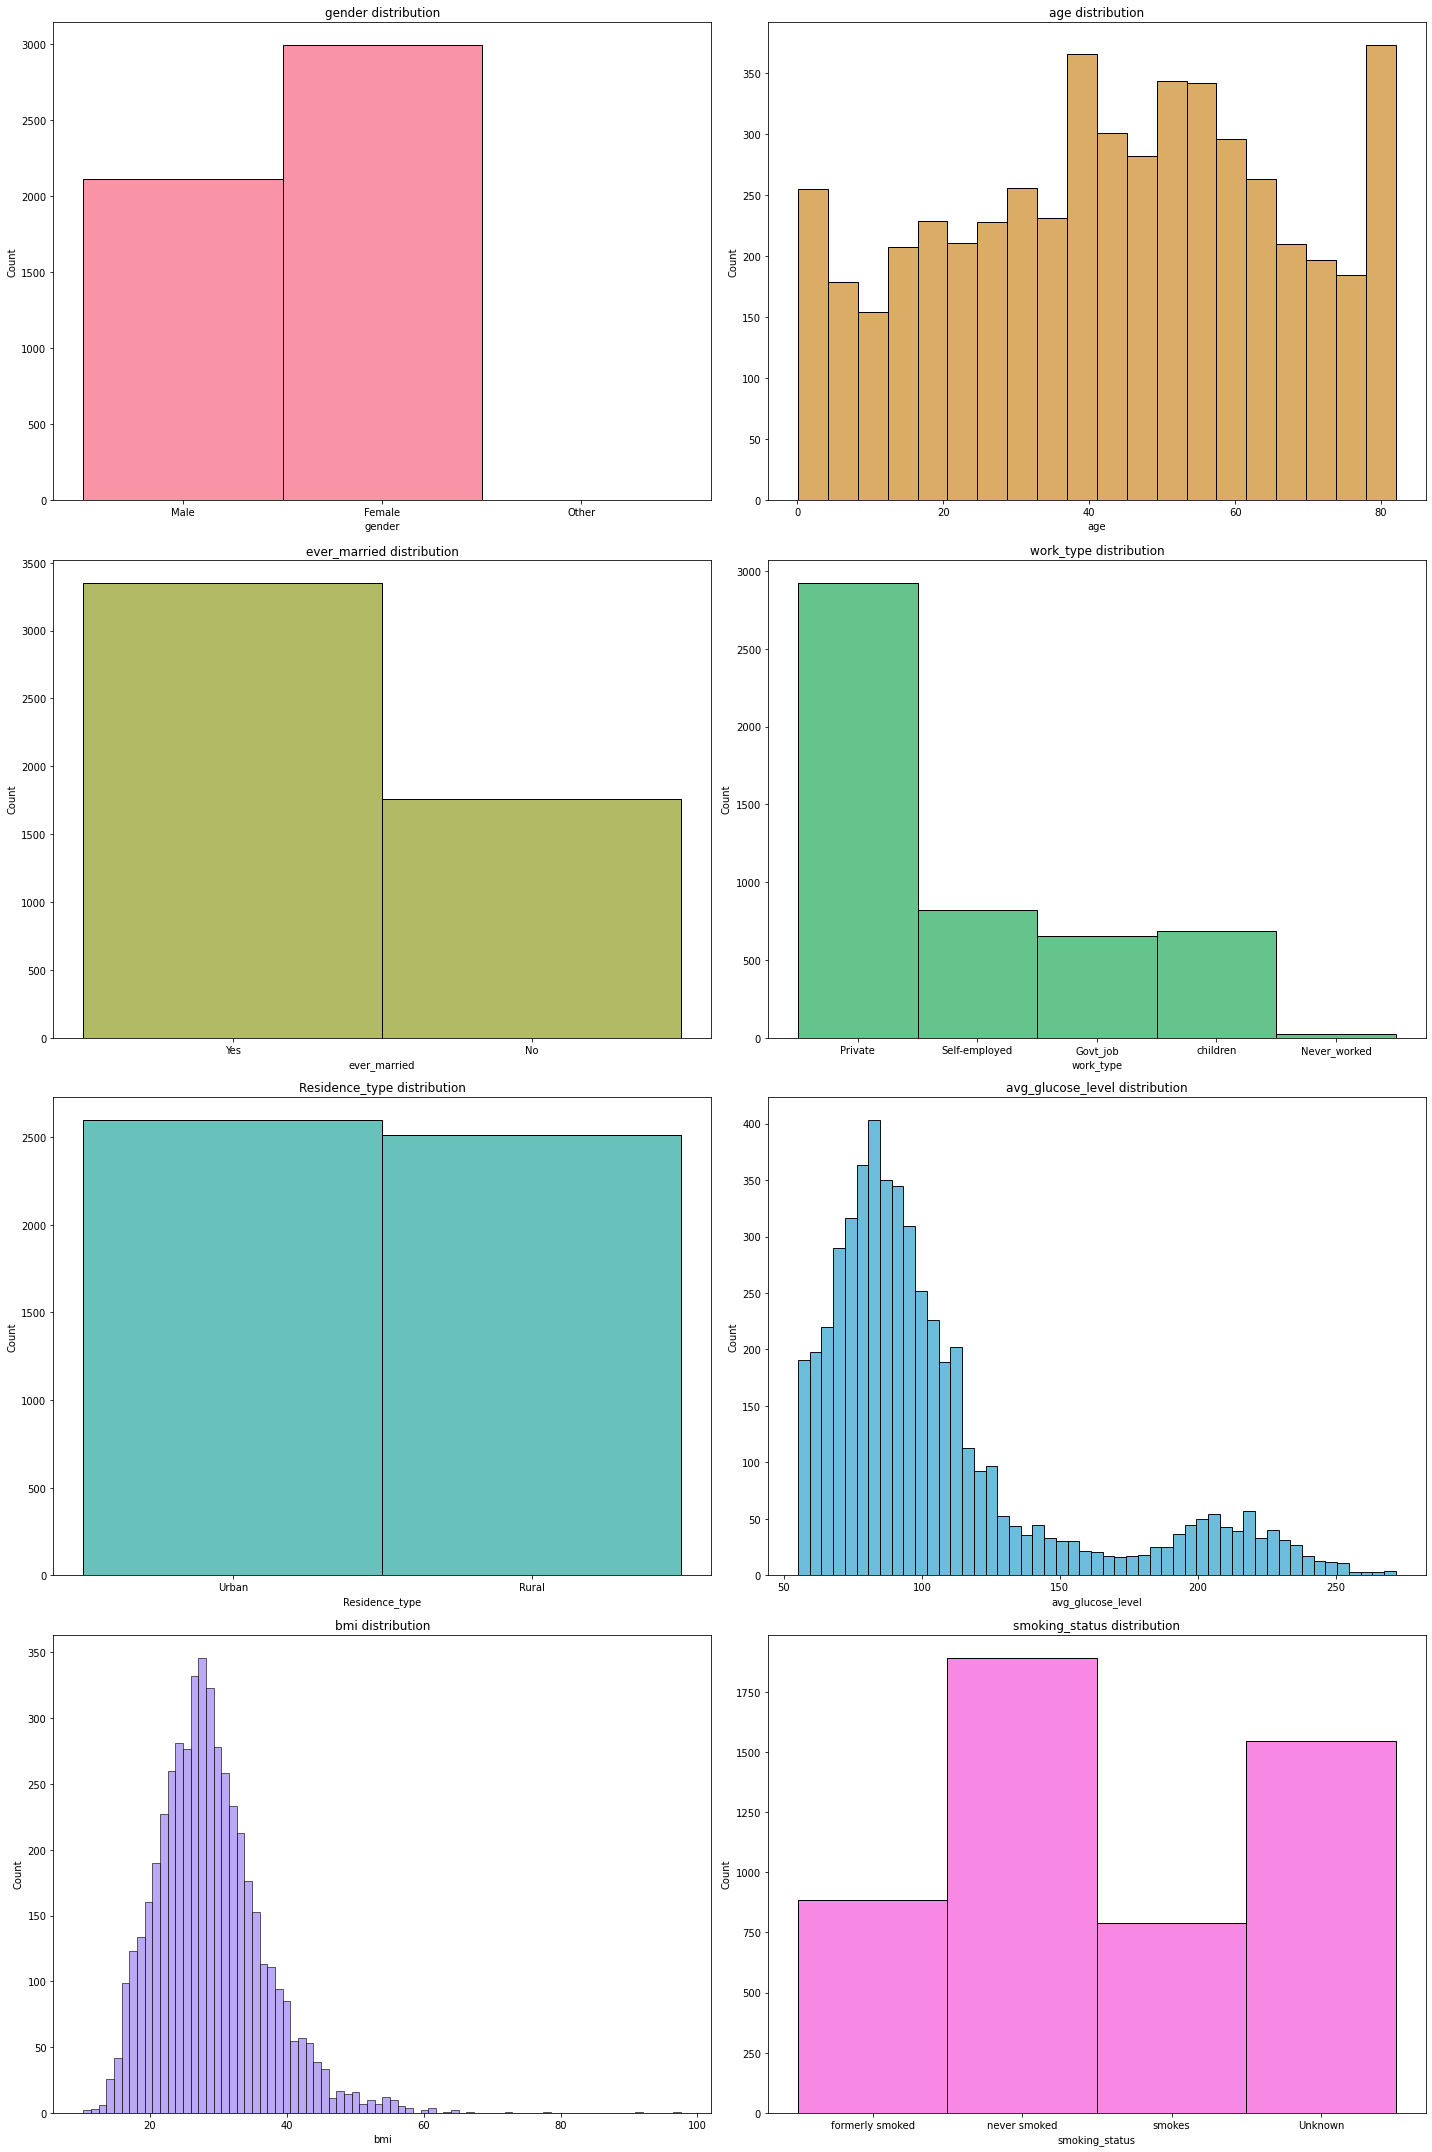

In [5]:
# Creating some histograms below for different vaiables to see the data distribution

plt.figure(figsize=(20,30))

plots_list = ['gender', 'age', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

plot_colours = sns.color_palette("husl", len(plots_list)) 

for i, (plot, colour) in enumerate(zip(plots_list, plot_colours), 1):
    plt.subplot(4,2,i)
    sns.histplot(data=stroke_data, x=plot, color=colour)
    plt.title(f"{plot} distribution")
    
plt.tight_layout()

**Preliminary observations:**
* Female patient count is ~40% higher than male patient count in the survey (around 3000 females vs around 2150 males)
* Majority of the patients are married and work in the private sector
* The BMI column has a few missing entries

## Analyzing the data

To make things easier, I'll create a separate DataFrame that has the data for only those patients who had a stroke.

In [6]:
stroke_only_data = stroke_data[stroke_data['stroke'] == 1]
stroke_only_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


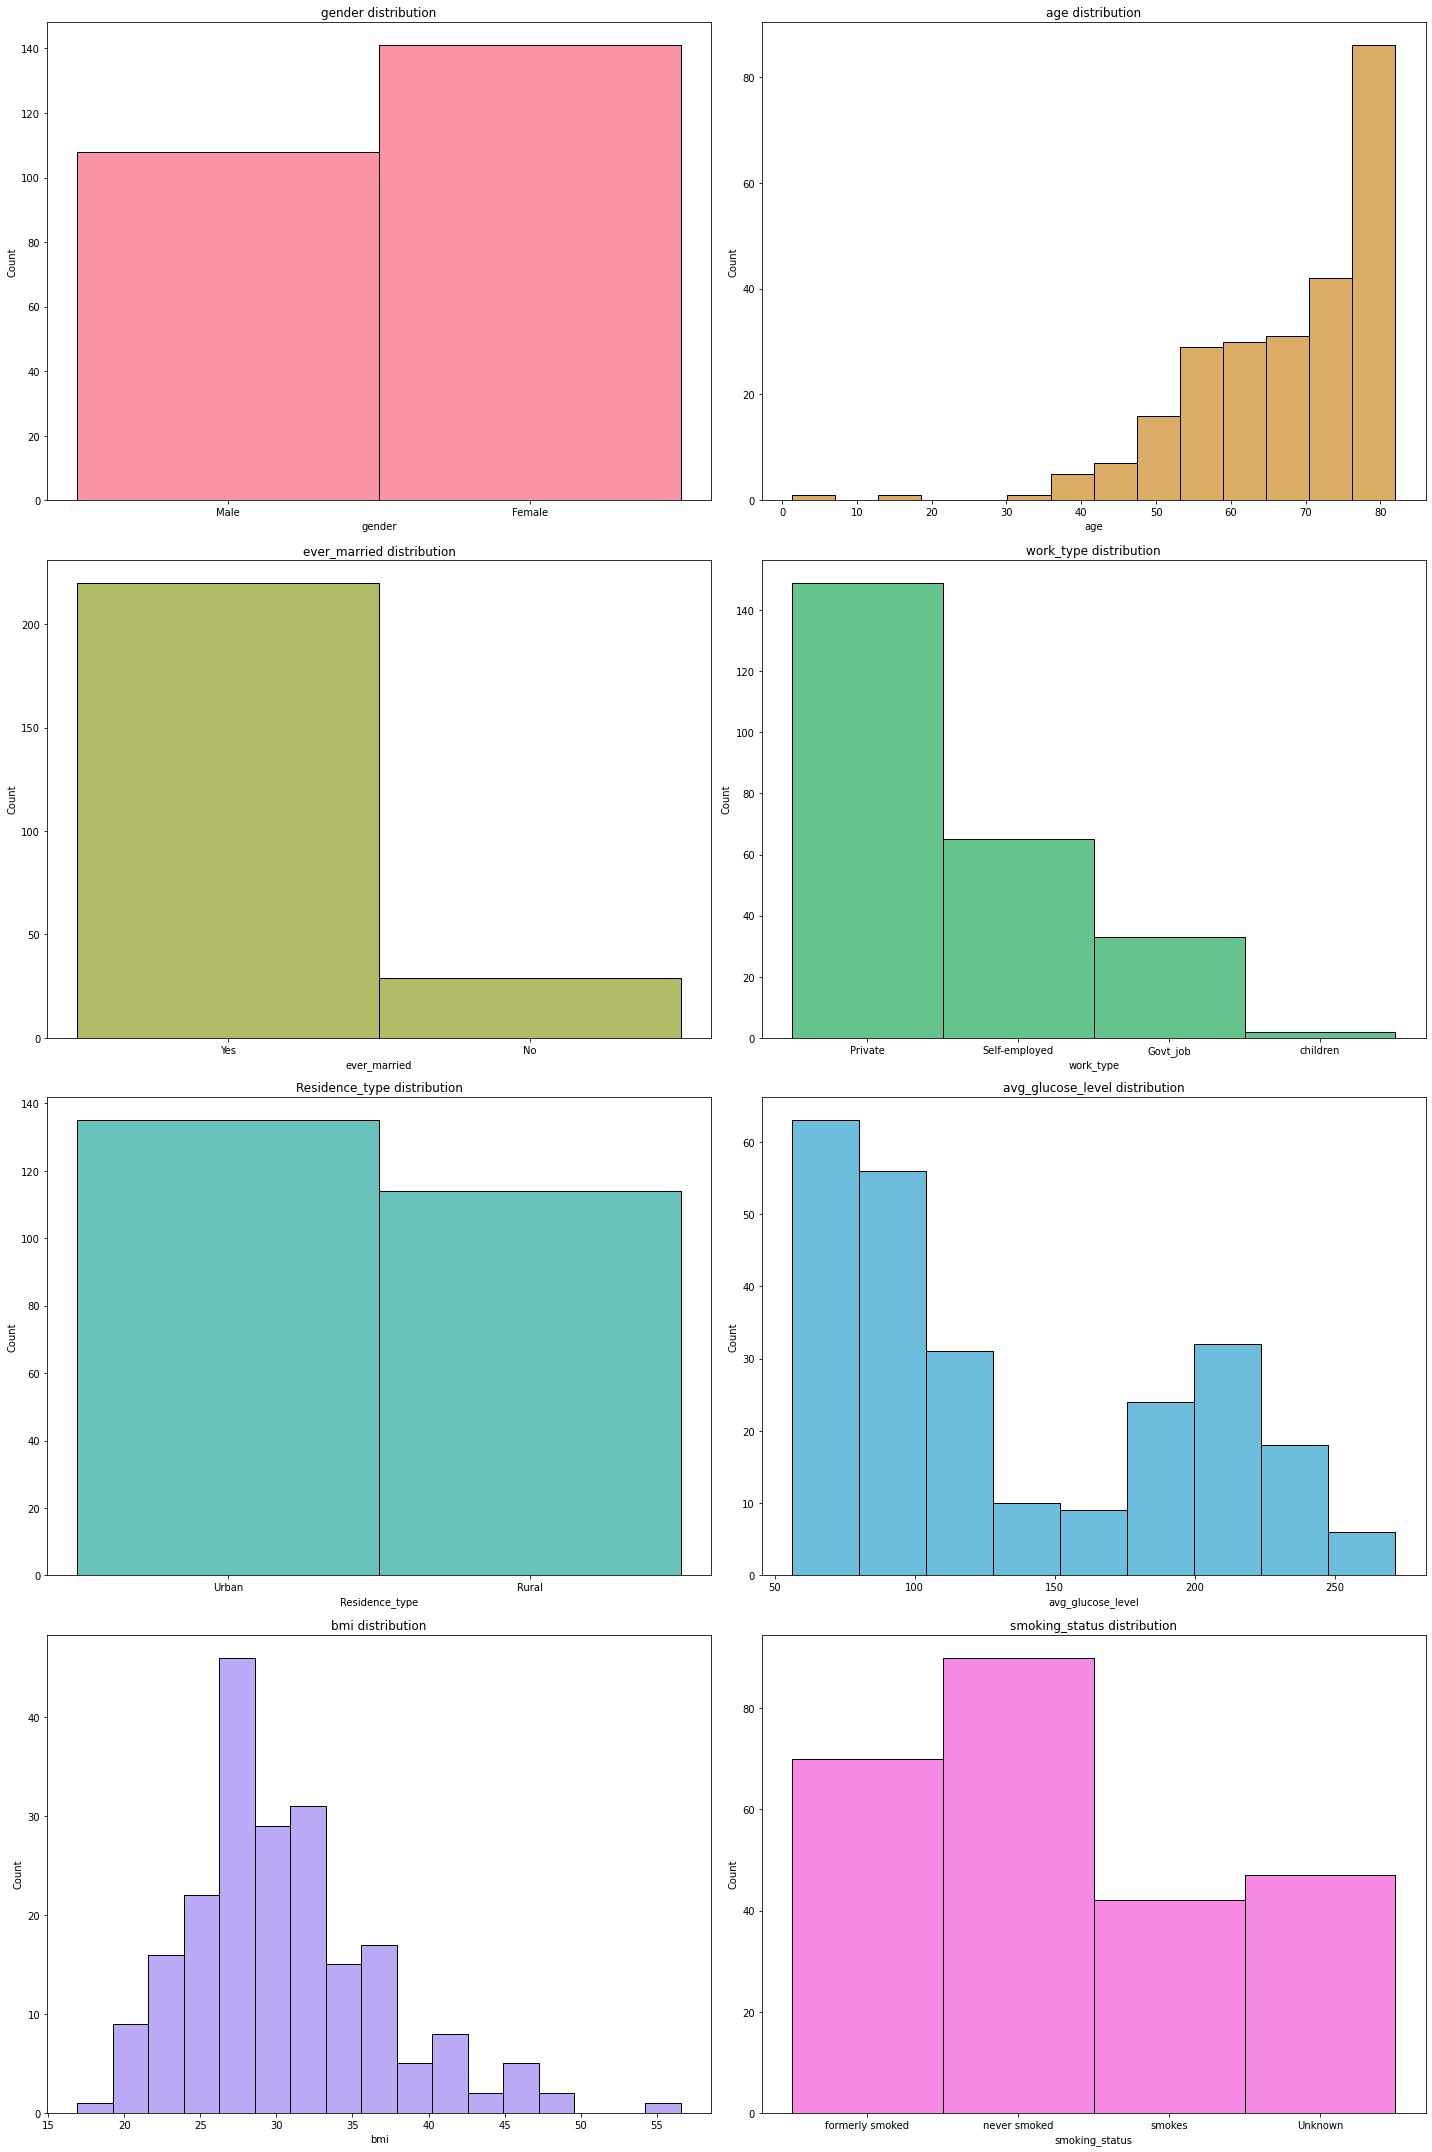

In [7]:
# Creating histograms below for the same vaiables as before to see the data distribution of patients who suffered a stroke

plt.figure(figsize=(20,30))

for i, (plot, colour) in enumerate(zip(plots_list, plot_colours), 1):
    plt.subplot(4,2,i)
    sns.histplot(data=stroke_only_data, x=plot, color=colour)
    plt.title(f"{plot} distribution")
    
plt.tight_layout()

In [8]:
# Checking whether stroke is more common for a particular gender (igoring "Other" gender since there's only 1 record of it)

male_total_count = int((stroke_data['gender'] == 'Male').sum())
female_total_count = int((stroke_data['gender'] == 'Female').sum())

male_stroke_count = int((stroke_only_data['gender'] == 'Male').sum())
female_stroke_count = int((stroke_only_data['gender'] == 'Female').sum())

male_stroke_percent = round(male_stroke_count/male_total_count * 100, 2)
female_stroke_percent = round(female_stroke_count/female_total_count * 100, 2)

print(f"{male_stroke_percent}% of {male_total_count} males sufffered a stroke, while {female_stroke_percent}% of {female_total_count} females suffered a stroke.")

5.11% of 2115 males sufffered a stroke, while 4.71% of 2994 females suffered a stroke.


In [9]:
# Checking the average and median age of the patients who suffered a stroke

average_stroke_age = round(stroke_only_data['age'].mean(), 2)
median_stroke_age = stroke_only_data['age'].median()

print(f"The average age of the patient who suffered a stroke was {average_stroke_age}, and the median age was {median_stroke_age}.")

The average age of the patient who suffered a stroke was 67.73, and the median age was 71.0.


In [10]:
# Checking the effect of hypertension

hypertension_total_count = stroke_data['hypertension'].sum()
hypertension_stroke_count = stroke_only_data['hypertension'].sum()

print(f"{round(hypertension_stroke_count/hypertension_total_count * 100, 2)}% of {hypertension_total_count} patients who have hypertension suffered a stroke.")

13.25% of 498 patients who have hypertension suffered a stroke.


In [11]:
# Checking the effect of heart disease

heart_disease_total_count = stroke_data['heart_disease'].sum()
heart_disease_stroke_count = stroke_only_data['heart_disease'].sum()

print(f"{round(heart_disease_stroke_count/heart_disease_total_count * 100, 2)}% of {heart_disease_total_count} patients who have a heart disease suffered a stroke.")

17.03% of 276 patients who have a heart disease suffered a stroke.


In [12]:
# Checking the effect of both hypertension and heart disease

both_hyper_heart_total_count = stroke_data[(stroke_data['hypertension'] == 1) & (stroke_data['heart_disease'] == 1)]['hypertension'].sum()
both_hyper_heart_stroke_count = stroke_only_data[(stroke_only_data['hypertension'] == 1) & (stroke_only_data['heart_disease'] == 1)]['hypertension'].sum()

print(f"{round(both_hyper_heart_stroke_count/both_hyper_heart_total_count * 100, 2)}% of {both_hyper_heart_total_count} patients who suffer from both hypertension and heart disease suffered a stroke.")

20.31% of 64 patients who suffer from both hypertension and heart disease suffered a stroke.


In [13]:
# Checking the effect of BMI

"""
As per the Wold Health Organisation (WHO), a healthy BMI lies between 18.5 and 24.9 (both inclusive). 
A BMI less than 18.5 is classified as underweight, and a BMI greater than 24.9 is classified as overweight.
"""

underweight_bmi_total_count = int((stroke_data['bmi'] < 18.5).sum())
healthy_bmi_total_count = int(((stroke_data['bmi'] >= 18.5) & (stroke_data['bmi'] <= 24.9)).sum())
overweight_bmi_total_count = int((stroke_data['bmi'] > 24.9).sum())

underweight_bmi_stroke_count = int((stroke_only_data['bmi'] < 18.5).sum())
healthy_bmi_stroke_count = int(((stroke_only_data['bmi'] >= 18.5) & (stroke_only_data['bmi'] <= 24.9)).sum())
overweight_bmi_stroke_count = int((stroke_only_data['bmi'] > 24.9).sum())

print(f"% of patients who suffered a stroke by BMI category:\nUnderweight (BMI < 18.5): {round(underweight_bmi_stroke_count/underweight_bmi_total_count * 100, 2)}% of {underweight_bmi_total_count} \nHealthy BMI (18.5 <= BMI <= 24.9): {round(healthy_bmi_stroke_count/healthy_bmi_total_count * 100, 2)}% of {healthy_bmi_total_count} \nOverweight (BMI > 24.9): {round(overweight_bmi_stroke_count/overweight_bmi_total_count * 100, 2)}% of {overweight_bmi_total_count}")

% of patients who suffered a stroke by BMI category:
Underweight (BMI < 18.5): 0.3% of 337 
Healthy BMI (18.5 <= BMI <= 24.9): 2.82% of 1243 
Overweight (BMI > 24.9): 5.2% of 3329


In [14]:
# Checking the effect of work type

work_categories = stroke_data['work_type'].unique()

print(f"% of patients who suffered a stroke based on their work type -")

for work_category in work_categories:
    
    work_category_total_count = int((stroke_data['work_type'] == work_category).sum())
    work_category_stroke_count = int((stroke_only_data['work_type'] == work_category).sum())
    
    print(f"{work_category}: {round(work_category_stroke_count/work_category_total_count * 100, 2)}% of {work_category_total_count}")

% of patients who suffered a stroke based on their work type -
Private: 5.09% of 2925
Self-employed: 7.94% of 819
Govt_job: 5.02% of 657
children: 0.29% of 687
Never_worked: 0.0% of 22


In [15]:
# Checking the average and median glucose level of the patients who suffered a stroke

average_stroke_glucose = round(stroke_only_data['avg_glucose_level'].mean(), 2)
median_stroke_glucose = stroke_only_data['avg_glucose_level'].median()

average_non_stroke_glucose = round(stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'].mean(), 2)
median_non_stroke_glucose = stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'].median()

print(f"The average glucose levels of the patients who suffered a stroke vs patients who did not suffer a stroke was {average_stroke_glucose} vs {average_non_stroke_glucose} and the median glucose levels were {median_stroke_glucose} vs {median_non_stroke_glucose} respectively.")

The average glucose levels of the patients who suffered a stroke vs patients who did not suffer a stroke was 132.54 vs 104.8 and the median glucose levels were 105.22 vs 91.47 respectively.


In [16]:
# Checking the effect of smoking

smoke_categories = stroke_data['smoking_status'].unique()

print(f"% of patients who suffered a stroke based on their smoking status -")

for smoke_category in smoke_categories:
    
    smoke_category_total_count = int((stroke_data['smoking_status'] == smoke_category).sum())
    smoke_category_stroke_count = int((stroke_only_data['smoking_status'] == smoke_category).sum())
    
    print(f"{smoke_category}: {round(smoke_category_stroke_count/smoke_category_total_count * 100, 2)}% of {smoke_category_total_count}")

% of patients who suffered a stroke based on their smoking status -
formerly smoked: 7.91% of 885
never smoked: 4.76% of 1892
smokes: 5.32% of 789
Unknown: 3.04% of 1544


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'hypertension'),
  Text(2.5, 0, 'heart_disease'),
  Text(3.5, 0, 'avg_glucose_level'),
  Text(4.5, 0, 'bmi')])

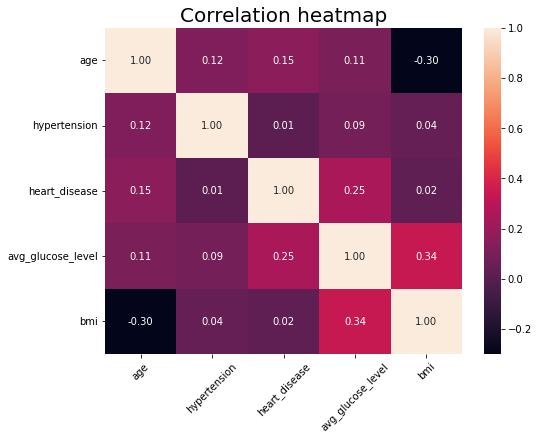

In [17]:
# Heatmap to see correlation between different factors for patients who had a stroke

heatmap_factors_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(8,6))

sns.heatmap(stroke_only_data[heatmap_factors_list].corr(), annot=True, fmt=".2f")

plt.title("Correlation heatmap", fontsize=20)
plt.xticks(rotation=45)

## Summarizing the observations

Using the analysis from Step 3, the following observations were made about whether a person will suffer a stroke:
* Gender doesn't seem to have any significance. The stroke rate was similar for both genders (5.11% for males and 4.71% for females).
* Older patients have a higher risk of suffering a stroke than younger ones. The average age of patients who suffered a stroke was around 68 years and the median age was 71 years.
* Hypertension doesn't seem to be significant. Only 13.25% of 498 patients who suffer from hypertension also suffered a stroke.
* Heart disease doesn't seem to be significant. Only 17.03% of 276 patients who suffer from heart disease also suffered a stroke.
* Only 20.31% of 64 patients who suffer from both hypertension and heart disease also suffered a stroke.
* Overweight patients (BMI > 24.9) seem to have a slightly higher risk of suffering a stroke than healthy or underweight patients.
* Patients who are self-employed seem to have a slightly higher risk (~8%) than private or government employed patients (both ~5%).
* Average glucose levels are a good indicator for predicting strokes. The average of average glucose levels of the patients who suffered a stroke was 132.54 and the median of the average glucose levels was 105.22.
* Patients who formerly smoked had the highest stroke rate (~8%) followed by patients who currently smoke (5.3%) and lastly by patients who never smoked (4.8%).
* No strong correlation was observed between any two of the following factors: age, hypertension, heart disease, average glucose level, and BMI.

## Conclusion

1. Which of the given factors contribute towards causing a heart stroke?
>Age and glucose levels are strong indicators for an occurance of heart stroke.
2. What can be said about the other factors observed from the data?
>Gender, residence type and smoking don't seem to have any significance on predicting a heart stroke.
3. What common trends can be identified between the patients who suffered a stroke?
>Older age and high average glucose levels were the only significant common traits identified between the patients who suffered a stroke.